In [40]:
import pandas as pd
from rdkit import Chem

def prepare_data():
    df_main = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.01.25.csv', index_col=0)
    df_main = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.05.07.csv', index_col=0)

    SMILES_to_fgroup = {}
    SMILES_to_identificator = {}
    SMILES_to_cycle_type = {}
    SMILES_to_pKa = {}
    for index, row in df_main.iterrows():
        SMILES = row['Smiles']
        if pd.isnull(SMILES):
            continue
        
        SMILES_to_fgroup[SMILES] = row['F group']
        SMILES_to_identificator[SMILES] = row['identificator']
        SMILES_to_cycle_type[SMILES] = row['Framework']
        SMILES_to_pKa[SMILES] = row['pKa']
    
    return SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_pKa

def train_test_smiles_data(is_canon=True):
    train = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\pKa_basicity_data\gnn_cv_canon_smiles\train_basic.csv')
    test = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\pKa_basicity_data\gnn_cv_canon_smiles\test_basic.csv')

    train_SMILES = train['Smiles'].tolist()
    test_SMILES = test['Smiles'].tolist()

    smiles_to_fold = {}
    for index, row in train.iterrows():
        smiles_to_fold[row['Smiles']] = row['fold_id']

    if is_canon:
        for train_index in range(len(train_SMILES)):
            train_SMILES[train_index] = Chem.CanonSmiles(train_SMILES[train_index])
        for test_index in range(len(test_SMILES)):
            test_SMILES[test_index] = Chem.CanonSmiles(test_SMILES[test_index])
    
    return train_SMILES, test_SMILES, smiles_to_fold

train_SMILES, test_SMILES, smiles_to_fold = train_test_smiles_data()

In [41]:
# all test(separate model for each molecule)
# relevances_fluorine_all = {'O=C(O)C1CCC(F)(F)CC1': -0.053, 'O=C(O)C1CCCCC1': 0.0, 'O=C(O)[C@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'O=C(O)[C@H]1C[C@@H]2[C@H](C1)C2(F)F': -0.102, 'O=C(O)[C@@H]1C[C@@H]2[C@H](C1)C2(F)F': -0.104, 'O=C(O)C1CCC1': 0.0, 'O=C(O)C1(CF)CCC1': -0.848, 'O=C(O)C1(C(F)F)CCC1': -0.902, 'O=C(O)C1(C(F)(F)F)CCC1': -1.372, 'O=C(O)[C@H]1C[C@H](C(F)(F)F)C1': -0.281, 'O=C(O)[C@H]1C[C@@H](C(F)(F)F)C1': -0.32, 'O=C(O)[C@H]1C[C@H](C(F)F)C1': -0.327, 'O=C(O)[C@H]1C[C@@H](C(F)F)C1': -0.246, 'O=C(O)[C@H]1C[C@H](CF)C1': -0.328, 'O=C(O)[C@H]1C[C@@H](CF)C1': -0.307, 'O=C(O)C1CC1(F)F': -1.148, 'O=C(O)C1CCC1(F)F': -0.962, 'O=C(O)C1CC(F)(F)C1': -0.687, 'O=C(O)C1CCCC1(F)F': -0.865, 'O=C(O)C1CCC(F)(F)C1': -0.092, 'O=C(O)C1CCCCC1(F)F': -0.854, 'O=C(O)C1CCCCCC1(F)F': -0.261, 'O=C(O)C1CCCCC(F)(F)C1': -0.094, 'O=C(O)C1CCCC(F)(F)CC1': -0.031, 'CCC(F)(F)CC(=O)O': -0.957, 'CC(F)(F)CCC(=O)O': -0.111, 'O=C(O)C1CC1': 0.0, 'O=C(O)C1CCCC1': 0.0, 'O=C(O)C1CCCCCC1': 0.0, 'CCCCC(=O)O': 0.0, 'O=C(O)C1CC2(CCC2)C1': 0.0, 'O=C(O)C1CC2(C1)CC(F)(F)C2': -0.005, 'O=C(O)[C@@H]1CC[C@H]1C(F)(F)F': -0.319, 'O=C(O)[C@@H]1CC[C@H]1C(F)F': -0.321, 'O=C(O)[C@@H]1CC[C@H]1CF': -0.182, 'O=C(O)[C@@H]1C[C@H]1C(F)(F)F': -0.277, 'O=C(O)[C@H]1C[C@H]1C(F)(F)F': -0.291, 'O=C(O)[C@@H]1C[C@H]1C(F)F': -0.369, 'O=C(O)[C@H]1C[C@H]1C(F)F': -0.372, 'O=C(O)[C@@H]1C[C@H]1CF': -0.327, 'C[C@@H]1C[C@H]1C(=O)O': 0.0, 'C[C@@H]1C[C@@H]1C(=O)O': 0.0, 'O=C(O)C1C(F)(F)C12CC2': -0.211, 'N[C@@H]1C[C@@H]2[C@H](C1)C2(F)F': -1.297, 'N[C@H]1C[C@@H]2[C@H](C1)C2(F)F': -1.217, 'NC1CCC(F)(F)CC1': -1.192, 'NC1CCCCC1': 0.0, 'N[C@@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'N[C@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'FC(F)(F)C12CC(CN1)C2': -4.464, 'C1NC2CC1C2': 0.0, 'C1CCNC1': 0.0, 'CC12CC(CN1)C2': 0.0, 'FC(F)(F)C12CCC(CC1)CN2': -4.684, 'C1CC2CC1CN2': 0.0, 'C1CC2CCC1CN2': 0.0, 'C1CCNCC1': 0.0, 'FC(F)(F)C12CCCC(CN1)C2': -4.472, 'C1CC2CNC(C1)C2': 0.0, 'FC1(F)CC2CNCC(C2)C1': -0.046, 'FC1(F)CC2CNCC(C1)C2(F)F': -2.79, 'FC1(F)C2CCCC1CNC2': -2.638, 'C1CC2CNCC(C1)C2': 0.0, 'FC1(F)C2CNCC1COC2': -3.025, 'C1NCC2COCC1C2': 0.0, 'C1CC2CNCC1C2': 0.0, 'C1CNC1': 0.0, 'FC1(F)CNC1': -4.695, 'FC1CCNC1': -2.517, 'FC1(F)CCNC1': -3.875, 'F[C@@H]1CNC[C@@H]1F': -4.274, 'F[C@@H]1CNC[C@H]1F': -4.379, 'FC1CCCNC1': -1.699, 'FC1(F)CCCNC1': -2.897, 'F[C@@H]1CNC[C@H](F)C1': -3.976, 'F[C@@H]1CNC[C@@H](F)C1': -3.324, 'FC1CCNCC1': -1.41, 'F[C@@H]1CCNC[C@@H]1F': -3.419, 'F[C@@H]1CCNC[C@H]1F': -3.505, 'NC1(C(F)(F)F)CCC1': -3.41, 'NC1(C(F)F)CCC1': -3.94, 'NC1(CF)CCC1': -3.136, 'NC1CCC1': 0.0, 'N[C@H]1C[C@H](C(F)(F)F)C1': -1.22, 'N[C@H]1C[C@@H](C(F)(F)F)C1': -1.179, 'N[C@H]1C[C@H](C(F)F)C1': -1.106, 'N[C@H]1C[C@@H](C(F)F)C1': -1.03, 'N[C@H]1C[C@H](CF)C1': -0.812, 'N[C@H]1C[C@@H](CF)C1': -0.698, 'FC(F)C1CCCCN1': -2.857, 'FC(F)C1CCCN1': -2.701, 'FC(F)(F)C1CCN1': -4.154, 'FC(F)C1CCN1': -3.019, 'NCCF': -3.428, 'FC(F)(F)C1CCCNC1': -1.296, 'FC(F)C1CCCNC1': -0.875, 'FCC1CCCNC1': -0.284, 'FC(F)C1CCNC1': -0.838, 'FCC1CCNC1': -0.277, 'FC(F)(F)C1CNC1': -2.507, 'FC(F)C1CNC1': -1.832, 'FCC1CNC1': -0.799, 'NCCC(F)F': -1.574, 'NCCCF': -1.24, 'CCN': 0.0, 'FC(F)C1CCNCC1': -0.389, 'FCC1CCNCC1': -0.073, 'NCCCCF': -0.264, 'NCCCC(F)F': -0.323, 'NCCCC(F)(F)F': -0.579, 'CCCN': 0.0, 'NC1CCC1(F)F': -3.06, 'NC1CC(F)(F)C1': -1.584, 'NC1CCCCC1(F)F': -2.972, 'NC1CCCC(F)(F)C1': -1.022, 'NC1CCCCCC1(F)F': -3.08, 'NC1CCCCC(F)(F)C1': -1.121, 'NC1CCCC(F)(F)CC1': -0.778, 'CCC(F)(F)CN': -2.46, 'CC(F)(F)CCN': -0.829, 'NC1CC1': 0.0, 'NC1CCCC1': 0.0, 'NC1CCCCCC1': 0.0, 'NC1CC2(CCC2)C1': 0.0, 'NC1CC2(C1)CC(F)(F)C2': -0.451, 'N[C@@H]1CC[C@H]1C(F)(F)F': -2.264, 'N[C@@H]1CC[C@H]1CF': -1.658, 'N[C@@H]1C[C@H]1C(F)(F)F': -2.056, 'N[C@H]1C[C@H]1C(F)(F)F': -2.019, 'N[C@@H]1C[C@H]1C(F)F': -1.992, 'N[C@H]1C[C@H]1C(F)F': -1.937, 'C[C@@H]1C[C@H]1N': 0.0, 'NC1CC12CC2': 0.0, 'O=C(O)C1CC12CC2(F)F': -0.22, 'O=C(O)C12CC(CO1)C2': 0.0, 'O=C(O)C1CCCC(F)(F)C1': -0.303, 'O=C(O)[C@@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'O=C(O)C1CC2(CC(F)C2)C1': -0.001, 'O=C(O)C1CC12CC2': 0.0, 'O=C(O)CCCC(F)F': -0.007, 'FC(F)(F)C12CCC(CN1)C2': -4.415, 'FC(F)(F)C1CCCN1': -4.459, 'FC(F)(F)C1CCCCN1': -3.831, 'NC1CC12CC2(F)F': -1.007, 'NC1CCCC1(F)F': -3.193, 'FC1(F)CCNCC1': -2.733, 'FC1(F)C2CCC1CNC2': -2.793, 'NC1CCC(F)(F)C1': -1.693, 'FC1CNC1': -3.253, 'N[C@@H]1CC[C@H]1C(F)F': -1.941, 'C[C@@H]1C[C@@H]1N': 0.0, 'FCC1CCCCN1': -1.027, 'FCC1CCCN1': -0.801, 'FCC1CCN1': -1.1, 'NC1CC2(C1)CC(F)C2': -0.064, 'FC(F)(F)C1CCNCC1': -0.266, 'CCCCN': 0.0, 'CC12CCC(CC1)CN2': 0.0, 'CC12CCCC(CN1)C2': 0.0}
# all test(separate model for each molecule) / fixed CF3
# relevances_fluorine_all = {'O=C(O)C1CCC(F)(F)CC1': -0.053, 'O=C(O)C1CCCCC1': 0.0, 'O=C(O)[C@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'O=C(O)[C@H]1C[C@@H]2[C@H](C1)C2(F)F': -0.102, 'O=C(O)[C@@H]1C[C@@H]2[C@H](C1)C2(F)F': -0.104, 'O=C(O)C1CCC1': 0.0, 'O=C(O)C1(CF)CCC1': -0.848, 'O=C(O)C1(C(F)F)CCC1': -0.902, 'O=C(O)C1(C(F)(F)F)CCC1': -1.372, 'O=C(O)[C@H]1C[C@H](C(F)(F)F)C1': -0.281, 'O=C(O)[C@H]1C[C@@H](C(F)(F)F)C1': -0.32, 'O=C(O)[C@H]1C[C@H](C(F)F)C1': -0.327, 'O=C(O)[C@H]1C[C@@H](C(F)F)C1': -0.246, 'O=C(O)[C@H]1C[C@H](CF)C1': -0.328, 'O=C(O)[C@H]1C[C@@H](CF)C1': -0.307, 'O=C(O)C1CC1(F)F': -1.148, 'O=C(O)C1CCC1(F)F': -0.962, 'O=C(O)C1CC(F)(F)C1': -0.687, 'O=C(O)C1CCCC1(F)F': -0.865, 'O=C(O)C1CCC(F)(F)C1': -0.092, 'O=C(O)C1CCCCC1(F)F': -0.854, 'O=C(O)C1CCCCCC1(F)F': -0.261, 'O=C(O)C1CCCCC(F)(F)C1': -0.094, 'O=C(O)C1CCCC(F)(F)CC1': -0.031, 'CCC(F)(F)CC(=O)O': -0.957, 'CC(F)(F)CCC(=O)O': -0.111, 'O=C(O)C1CC1': 0.0, 'O=C(O)C1CCCC1': 0.0, 'O=C(O)C1CCCCCC1': 0.0, 'CCCCC(=O)O': 0.0, 'O=C(O)C1CC2(CCC2)C1': 0.0, 'O=C(O)C1CC2(C1)CC(F)(F)C2': -0.005, 'O=C(O)[C@@H]1CC[C@H]1C(F)(F)F': -0.319, 'O=C(O)[C@@H]1CC[C@H]1C(F)F': -0.321, 'O=C(O)[C@@H]1CC[C@H]1CF': -0.182, 'O=C(O)[C@@H]1C[C@H]1C(F)(F)F': -0.277, 'O=C(O)[C@H]1C[C@H]1C(F)(F)F': -0.291, 'O=C(O)[C@@H]1C[C@H]1C(F)F': -0.369, 'O=C(O)[C@H]1C[C@H]1C(F)F': -0.372, 'O=C(O)[C@@H]1C[C@H]1CF': -0.327, 'C[C@@H]1C[C@H]1C(=O)O': 0.0, 'C[C@@H]1C[C@@H]1C(=O)O': 0.0, 'O=C(O)C1C(F)(F)C12CC2': -0.211, 'N[C@@H]1C[C@@H]2[C@H](C1)C2(F)F': -1.297, 'N[C@H]1C[C@@H]2[C@H](C1)C2(F)F': -1.217, 'NC1CCC(F)(F)CC1': -1.192, 'NC1CCCCC1': 0.0, 'N[C@@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'N[C@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'FC(F)(F)C12CC(CN1)C2': -4.464, 'C1NC2CC1C2': 0.0, 'C1CCNC1': 0.0, 'CC12CC(CN1)C2': 0.0, 'FC(F)(F)C12CCC(CC1)CN2': -4.684, 'C1CC2CC1CN2': 0.0, 'C1CC2CCC1CN2': 0.0, 'C1CCNCC1': 0.0, 'FC(F)(F)C12CCCC(CN1)C2': -4.472, 'C1CC2CNC(C1)C2': 0.0, 'FC1(F)CC2CNCC(C2)C1': -0.046, 'FC1(F)CC2CNCC(C1)C2(F)F': -2.79, 'FC1(F)C2CCCC1CNC2': -2.638, 'C1CC2CNCC(C1)C2': 0.0, 'FC1(F)C2CNCC1COC2': -3.025, 'C1NCC2COCC1C2': 0.0, 'C1CC2CNCC1C2': 0.0, 'C1CNC1': 0.0, 'FC1(F)CNC1': -4.695, 'FC1CCNC1': -2.517, 'FC1(F)CCNC1': -3.875, 'F[C@@H]1CNC[C@@H]1F': -4.274, 'F[C@@H]1CNC[C@H]1F': -4.379, 'FC1CCCNC1': -1.699, 'FC1(F)CCCNC1': -2.897, 'F[C@@H]1CNC[C@H](F)C1': -3.976, 'F[C@@H]1CNC[C@@H](F)C1': -3.324, 'FC1CCNCC1': -1.41, 'F[C@@H]1CCNC[C@@H]1F': -3.419, 'F[C@@H]1CCNC[C@H]1F': -3.505, 'NC1(C(F)(F)F)CCC1': -3.618, 'NC1(C(F)F)CCC1': -3.94, 'NC1(CF)CCC1': -3.136, 'NC1CCC1': 0.0, 'N[C@H]1C[C@H](C(F)(F)F)C1': -1.22, 'N[C@H]1C[C@@H](C(F)(F)F)C1': -1.179, 'N[C@H]1C[C@H](C(F)F)C1': -1.106, 'N[C@H]1C[C@@H](C(F)F)C1': -1.03, 'N[C@H]1C[C@H](CF)C1': -0.812, 'N[C@H]1C[C@@H](CF)C1': -0.698, 'FC(F)C1CCCCN1': -2.857, 'FC(F)C1CCCN1': -2.701, 'FC(F)(F)C1CCN1': -4.154, 'FC(F)C1CCN1': -3.019, 'NCCF': -3.428, 'FC(F)(F)C1CCCNC1': -1.296, 'FC(F)C1CCCNC1': -0.875, 'FCC1CCCNC1': -0.284, 'FC(F)C1CCNC1': -0.838, 'FCC1CCNC1': -0.277, 'FC(F)(F)C1CNC1': -2.507, 'FC(F)C1CNC1': -1.832, 'FCC1CNC1': -0.799, 'NCCC(F)F': -1.574, 'NCCCF': -1.24, 'CCN': 0.0, 'FC(F)C1CCNCC1': -0.389, 'FCC1CCNCC1': -0.073, 'NCCCCF': -0.264, 'NCCCC(F)F': -0.323, 'NCCCC(F)(F)F': -0.579, 'CCCN': 0.0, 'NC1CCC1(F)F': -3.06, 'NC1CC(F)(F)C1': -1.584, 'NC1CCCCC1(F)F': -2.972, 'NC1CCCC(F)(F)C1': -1.022, 'NC1CCCCCC1(F)F': -3.08, 'NC1CCCCC(F)(F)C1': -1.121, 'NC1CCCC(F)(F)CC1': -0.778, 'CCC(F)(F)CN': -2.46, 'CC(F)(F)CCN': -0.829, 'NC1CC1': 0.0, 'NC1CCCC1': 0.0, 'NC1CCCCCC1': 0.0, 'NC1CC2(CCC2)C1': 0.0, 'NC1CC2(C1)CC(F)(F)C2': -0.451, 'N[C@@H]1CC[C@H]1C(F)(F)F': -2.264, 'N[C@@H]1CC[C@H]1CF': -1.658, 'N[C@@H]1C[C@H]1C(F)(F)F': -2.056, 'N[C@H]1C[C@H]1C(F)(F)F': -2.019, 'N[C@@H]1C[C@H]1C(F)F': -1.992, 'N[C@H]1C[C@H]1C(F)F': -1.937, 'C[C@@H]1C[C@H]1N': 0.0, 'NC1CC12CC2': 0.0, 'O=C(O)C1CC12CC2(F)F': -0.22, 'O=C(O)C12CC(CO1)C2': 0.0, 'O=C(O)C1CCCC(F)(F)C1': -0.303, 'O=C(O)[C@@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'O=C(O)C1CC2(CC(F)C2)C1': -0.001, 'O=C(O)C1CC12CC2': 0.0, 'O=C(O)CCCC(F)F': -0.007, 'FC(F)(F)C12CCC(CN1)C2': -4.415, 'FC(F)(F)C1CCCN1': -4.459, 'FC(F)(F)C1CCCCN1': -3.831, 'NC1CC12CC2(F)F': -1.007, 'NC1CCCC1(F)F': -3.193, 'FC1(F)CCNCC1': -2.733, 'FC1(F)C2CCC1CNC2': -2.793, 'NC1CCC(F)(F)C1': -1.693, 'FC1CNC1': -3.253, 'N[C@@H]1CC[C@H]1C(F)F': -1.941, 'C[C@@H]1C[C@@H]1N': 0.0, 'FCC1CCCCN1': -1.027, 'FCC1CCCN1': -0.801, 'FCC1CCN1': -1.1, 'NC1CC2(C1)CC(F)C2': -0.064, 'FC(F)(F)C1CCNCC1': -0.487, 'CCCCN': 0.0, 'CC12CCC(CC1)CN2': 0.0, 'CC12CCCC(CN1)C2': 0.0}
# all test(separate model for each molecule) / fixed CF3 / modified
relevances_fluorine_all = {'O=C(O)C1CCC(F)(F)CC1': -0.053, 'O=C(O)C1CCCCC1': 0.0, 'O=C(O)[C@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'O=C(O)[C@H]1C[C@@H]2[C@H](C1)C2(F)F': -0.102, 'O=C(O)[C@@H]1C[C@@H]2[C@H](C1)C2(F)F': -0.104, 'O=C(O)C1CCC1': 0.0, 'O=C(O)C1(CF)CCC1': -0.848, 'O=C(O)C1(C(F)F)CCC1': -0.902, 'O=C(O)C1(C(F)(F)F)CCC1': -1.372, 'O=C(O)[C@H]1C[C@H](C(F)(F)F)C1': -0.281, 'O=C(O)[C@H]1C[C@@H](C(F)(F)F)C1': -0.32, 'O=C(O)[C@H]1C[C@H](C(F)F)C1': -0.327, 'O=C(O)[C@H]1C[C@@H](C(F)F)C1': -0.246, 'O=C(O)[C@H]1C[C@H](CF)C1': -0.328, 'O=C(O)[C@H]1C[C@@H](CF)C1': -0.307, 'O=C(O)C1CC1(F)F': -1.148, 'O=C(O)C1CCC1(F)F': -0.962, 'O=C(O)C1CC(F)(F)C1': -0.687, 'O=C(O)C1CCCC1(F)F': -0.865, 'O=C(O)C1CCC(F)(F)C1': -0.092, 'O=C(O)C1CCCCC1(F)F': -0.854, 'O=C(O)C1CCCCCC1(F)F': -0.261, 'O=C(O)C1CCCCC(F)(F)C1': -0.094, 'O=C(O)C1CCCC(F)(F)CC1': -0.031, 'CCC(F)(F)CC(=O)O': -0.957, 'CC(F)(F)CCC(=O)O': -0.111, 'O=C(O)C1CC1': 0.0, 'O=C(O)C1CCCC1': 0.0, 'O=C(O)C1CCCCCC1': 0.0, 'CCCCC(=O)O': 0.0, 'O=C(O)C1CC2(CCC2)C1': 0.0, 'O=C(O)C1CC2(C1)CC(F)(F)C2': -0.005, 'O=C(O)[C@@H]1CC[C@H]1C(F)(F)F': -0.319, 'O=C(O)[C@@H]1CC[C@H]1C(F)F': -0.321, 'O=C(O)[C@@H]1CC[C@H]1CF': -0.182, 'O=C(O)[C@@H]1C[C@H]1C(F)(F)F': -0.277, 'O=C(O)[C@H]1C[C@H]1C(F)(F)F': -0.291, 'O=C(O)[C@@H]1C[C@H]1C(F)F': -0.369, 'O=C(O)[C@H]1C[C@H]1C(F)F': -0.372, 'O=C(O)[C@@H]1C[C@H]1CF': -0.327, 'C[C@@H]1C[C@H]1C(=O)O': 0.0, 'C[C@@H]1C[C@@H]1C(=O)O': 0.0, 'O=C(O)C1C(F)(F)C12CC2': -0.211, 'N[C@@H]1C[C@@H]2[C@H](C1)C2(F)F': -1.297, 'N[C@H]1C[C@@H]2[C@H](C1)C2(F)F': -1.217, 'NC1CCC(F)(F)CC1': -1.192, 'NC1CCCCC1': 0.0, 'N[C@@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'N[C@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'FC(F)(F)C12CC(CN1)C2': -4.464, 'C1NC2CC1C2': 0.0, 'C1CCNC1': 0.0, 'CC12CC(CN1)C2': 0.0, 'FC(F)(F)C12CCC(CC1)CN2': -4.684, 'C1CC2CC1CN2': 0.0, 'C1CC2CCC1CN2': 0.0, 'C1CCNCC1': 0.0, 'FC(F)(F)C12CCCC(CN1)C2': -4.472, 'C1CC2CNC(C1)C2': 0.0, 'FC1(F)CC2CNCC(C2)C1': -0.046, 'FC1(F)CC2CNCC(C1)C2(F)F': -2.79, 'FC1(F)C2CCCC1CNC2': -2.638, 'C1CC2CNCC(C1)C2': 0.0, 'FC1(F)C2CNCC1COC2': -3.025, 'C1NCC2COCC1C2': 0.0, 'C1CC2CNCC1C2': 0.0, 'C1CNC1': 0.0, 'FC1(F)CNC1': -4.695, 'FC1CCNC1': -2.517, 'FC1(F)CCNC1': -3.875, 'F[C@@H]1CNC[C@@H]1F': -4.274, 'F[C@@H]1CNC[C@H]1F': -4.379, 'FC1CCCNC1': -1.699, 'FC1(F)CCCNC1': -2.897, 'F[C@@H]1CNC[C@H](F)C1': -3.976, 'F[C@@H]1CNC[C@@H](F)C1': -3.324, 'FC1CCNCC1': -1.41, 'F[C@@H]1CCNC[C@@H]1F': -3.419, 'F[C@@H]1CCNC[C@H]1F': -3.505, 'NC1(C(F)(F)F)CCC1': -4.618, 'NC1(C(F)F)CCC1': -3.94, 'NC1(CF)CCC1': -3.136, 'NC1CCC1': 0.0, 'N[C@H]1C[C@H](C(F)(F)F)C1': -1.22, 'N[C@H]1C[C@@H](C(F)(F)F)C1': -1.179, 'N[C@H]1C[C@H](C(F)F)C1': -1.106, 'N[C@H]1C[C@@H](C(F)F)C1': -1.03, 'N[C@H]1C[C@H](CF)C1': -0.812, 'N[C@H]1C[C@@H](CF)C1': -0.698, 'FC(F)C1CCCCN1': -2.857, 'FC(F)C1CCCN1': -2.701, 'FC(F)(F)C1CCN1': -4.154, 'FC(F)C1CCN1': -3.019, 'NCCF': -3.428, 'FC(F)(F)C1CCCNC1': -1.296, 'FC(F)C1CCCNC1': -0.875, 'FCC1CCCNC1': -0.284, 'FC(F)C1CCNC1': -0.838, 'FCC1CCNC1': -0.277, 'FC(F)(F)C1CNC1': -2.507, 'FC(F)C1CNC1': -1.832, 'FCC1CNC1': -0.799, 'NCCC(F)F': -1.574, 'NCCCF': -1.24, 'CCN': 0.0, 'FC(F)C1CCNCC1': -0.389, 'FCC1CCNCC1': -0.073, 'NCCCCF': -0.264, 'NCCCC(F)F': -0.323, 'NCCCC(F)(F)F': -0.579, 'CCCN': 0.0, 'NC1CCC1(F)F': -3.06, 'NC1CC(F)(F)C1': -1.584, 'NC1CCCCC1(F)F': -2.972, 'NC1CCCC(F)(F)C1': -1.022, 'NC1CCCCCC1(F)F': -3.08, 'NC1CCCCC(F)(F)C1': -1.121, 'NC1CCCC(F)(F)CC1': -0.778, 'CCC(F)(F)CN': -2.46, 'CC(F)(F)CCN': -0.829, 'NC1CC1': 0.0, 'NC1CCCC1': 0.0, 'NC1CCCCCC1': 0.0, 'NC1CC2(CCC2)C1': 0.0, 'NC1CC2(C1)CC(F)(F)C2': -0.451, 'N[C@@H]1CC[C@H]1C(F)(F)F': -2.264, 'N[C@@H]1CC[C@H]1CF': -1.658, 'N[C@@H]1C[C@H]1C(F)(F)F': -2.056, 'N[C@H]1C[C@H]1C(F)(F)F': -2.019, 'N[C@@H]1C[C@H]1C(F)F': -1.992, 'N[C@H]1C[C@H]1C(F)F': -1.937, 'C[C@@H]1C[C@H]1N': 0.0, 'NC1CC12CC2': 0.0, 'O=C(O)C1CC12CC2(F)F': -0.22, 'O=C(O)C12CC(CO1)C2': 0.0, 'O=C(O)C1CCCC(F)(F)C1': -0.303, 'O=C(O)[C@@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'O=C(O)C1CC2(CC(F)C2)C1': -0.001, 'O=C(O)C1CC12CC2': 0.0, 'O=C(O)CCCC(F)F': -0.007, 'FC(F)(F)C12CCC(CN1)C2': -4.415, 'FC(F)(F)C1CCCN1': -4.459, 'FC(F)(F)C1CCCCN1': -3.831, 'NC1CC12CC2(F)F': -1.007, 'NC1CCCC1(F)F': -3.193, 'FC1(F)CCNCC1': -2.733, 'FC1(F)C2CCC1CNC2': -2.793, 'NC1CCC(F)(F)C1': -1.693, 'FC1CNC1': -3.253, 'N[C@@H]1CC[C@H]1C(F)F': -1.941, 'C[C@@H]1C[C@@H]1N': 0.0, 'FCC1CCCCN1': -1.027, 'FCC1CCCN1': -0.801, 'FCC1CCN1': -1.1, 'NC1CC2(C1)CC(F)C2': -0.064, 'FC(F)(F)C1CCNCC1': -0.487, 'CCCCN': 0.0, 'CC12CCC(CC1)CN2': 0.0, 'CC12CCCC(CN1)C2': 0.0}

SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_pKa = prepare_data()
train_smiles, test_smiles, smiles_to_fold = train_test_smiles_data()

relevances_fluorine = {}
for SMILES, relevance in relevances_fluorine_all.items():
    if "secon" in SMILES_to_identificator[SMILES].lower():
        relevances_fluorine[SMILES] = relevance

cyclobutane = {1: {}, 2: {}} # logP_O=C(N1CCC1)C1=CC=CC=C1
cyclopentane = {1: {}, 2: {}} #  logP_O=C(N1CCCC1)C1=CC=CC=C1
cyclohexan = {1: {}, 2: {}, 3: {}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
methane = {1: {}, 2: {}, 3: {}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

In [42]:
from collections import deque

functional_group_to_smiles = {
    "CF3": "CC(F)(F)F", 
    "CH2F": "CCF", 
    "gem-CF2": "CF", 
    "CHF2": "CC(F)(F)",
    "CHF": "CF",
    "non-F": ""
}

def find_the_closest_nitrogen_atom(
        mol, atom_id: int, 
        atoms_not_to_visit: list = []):

    queue = deque([(atom_id, 0)])

    visited = set()
    
    while queue:
        current_atom, distance = queue.popleft()
        if mol.GetAtomWithIdx(current_atom).GetSymbol().lower() == 'n':
            break

        visited.add(current_atom)
        
        neighbors = []
        for atom in mol.GetAtomWithIdx(current_atom).GetNeighbors():
            if atom.GetSymbol().lower() == 'h':
                continue
            if atom.GetIdx() in atoms_not_to_visit:
                continue
            neighbors.append(atom.GetIdx())
        
        for neighbor in neighbors:
            if neighbor not in visited:
                queue.append((neighbor, distance + 1))
    
    return current_atom, distance

In [43]:
from rdkit import Chem
import math

smiles_to_distance_to_nitrogen = {}

def is_secondary_amine(mol):
    # find nitrogen atom
    for atom in mol.GetAtoms():
        if atom.GetSymbol().lower() == 'n':
            nitrogen_atom_idx = atom.GetIdx()

    logP_ring_mol = Chem.MolFromSmiles('C1=CC=CC=C1')

    logP_ring_mol_match = list(mol.GetSubstructMatches(logP_ring_mol)[0])

    for atom in mol.GetAtomWithIdx(nitrogen_atom_idx).GetNeighbors():
        if atom.GetIdx() in logP_ring_mol_match:
            return False
    
    return True


for SMILES, relevance in relevances_fluorine.items():
    f_group_smiles = functional_group_to_smiles[SMILES_to_fgroup[SMILES]]

    mol = Chem.MolFromSmiles(SMILES)

    fluorine_deratives_mol = Chem.MolFromSmiles(f_group_smiles)

    derivatives_matches = mol.GetSubstructMatches(fluorine_deratives_mol)
    

    min_distance_to_nitrogen = math.inf
    # is_secondary_amine_mol = is_secondary_amine(mol)
    
    for match in derivatives_matches:
        from_atom = match[0]

        target_atom, distance = find_the_closest_nitrogen_atom(mol=mol, atom_id=from_atom)
        
        if distance < min_distance_to_nitrogen:
            min_distance_to_nitrogen = distance

    smiles_to_distance_to_nitrogen[SMILES] = min_distance_to_nitrogen

    if SMILES_to_cycle_type[SMILES] == 'methane' and f_group_smiles == "":
        smiles_to_distance_to_nitrogen[SMILES] = len(mol.GetAtoms()) - 2 - 8

    # print(SMILES, is_secondary_amine_mol)
    # if not is_secondary_amine_mol:
    #     smiles_to_distance_to_nitrogen[SMILES] = math.inf
    print(SMILES, derivatives_matches, SMILES_to_fgroup[SMILES], min_distance_to_nitrogen)

FC(F)(F)C12CC(CN1)C2 ((4, 1, 0, 2, 3),) CF3 1
C1NC2CC1C2 () non-F inf
C1CCNC1 () non-F inf
CC12CC(CN1)C2 () non-F inf
FC(F)(F)C12CCC(CC1)CN2 ((4, 1, 0, 2, 3),) CF3 1
C1CC2CC1CN2 () non-F inf
C1CC2CCC1CN2 () non-F inf
C1CCNCC1 () non-F inf
FC(F)(F)C12CCCC(CN1)C2 ((4, 1, 0, 2, 3),) CF3 1
C1CC2CNC(C1)C2 () non-F inf
FC1(F)CC2CNCC(C2)C1 ((1, 0), (1, 2)) gem-CF2 4
FC1(F)CC2CNCC(C1)C2(F)F ((1, 0), (1, 2), (10, 11), (10, 12)) gem-CF2 3
FC1(F)C2CCCC1CNC2 ((1, 0), (1, 2)) gem-CF2 3
C1CC2CNCC(C1)C2 () non-F inf
FC1(F)C2CNCC1COC2 ((1, 0), (1, 2)) gem-CF2 3
C1NCC2COCC1C2 () non-F inf
C1CC2CNCC1C2 () non-F inf
C1CNC1 () non-F inf
FC1(F)CNC1 ((1, 0), (1, 2)) gem-CF2 2
FC1CCNC1 ((1, 0),) CHF 2
FC1(F)CCNC1 ((1, 0), (1, 2)) gem-CF2 2
F[C@@H]1CNC[C@@H]1F ((1, 0), (5, 6)) CHF 2
F[C@@H]1CNC[C@H]1F ((1, 0), (5, 6)) CHF 2
FC1CCCNC1 ((1, 0),) CHF 2
FC1(F)CCCNC1 ((1, 0), (1, 2)) gem-CF2 2
F[C@@H]1CNC[C@H](F)C1 ((1, 0), (5, 6)) CHF 2
F[C@@H]1CNC[C@@H](F)C1 ((1, 0), (5, 6)) CHF 2
FC1CCNCC1 ((1, 0),) CHF 3
F[C@@

cyclohexane CHF2 FC(F)C1CCCCN1 7.99 -2.857
cyclopentane CHF2 FC(F)C1CCCN1 7.78 -2.701
cyclobutane CF3 FC(F)(F)C1CCN1 5.84 -4.154
cyclobutane CHF2 FC(F)C1CCN1 7.83 -3.019
cyclopentane CF3 FC(F)(F)C1CCCN1 6.06 -4.459
cyclohexane CF3 FC(F)(F)C1CCCCN1 6.41 -3.831
cyclohexane CH2F FCC1CCCCN1 9.52 -1.027
cyclopentane CH2F FCC1CCCN1 9.55 -0.801
cyclobutane CH2F FCC1CCN1 9.67 -1.1
['CH2F', 'CHF2', 'CF3'] [-1.1, -3.019, -4.154]
['CH2F', 'CHF2', 'CF3'] [-0.801, -2.701, -4.459]
['CH2F', 'CHF2', 'CF3'] [-1.027, -2.857, -3.831]
[] []
['CH2F', 'CHF2', 'CF3'] [[-1.1, -0.801, -1.027], [-3.019, -2.701, -2.857], [-4.154, -4.459, -3.831]]


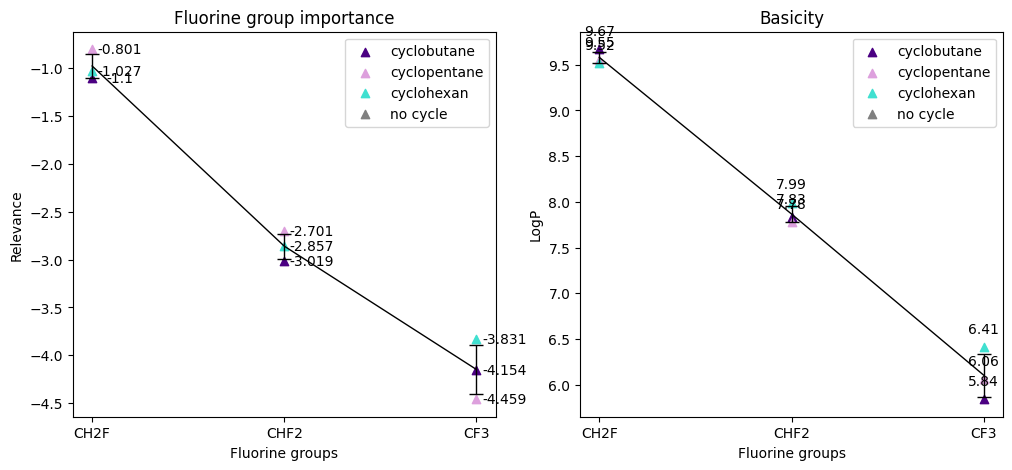

cyclobutane gem-CF2 FC1(F)CNC1 6.44 -4.695
cyclopentane CHF FC1CCNC1 8.87 -2.517
cyclopentane gem-CF2 FC1(F)CCNC1 6.88 -3.875
cyclopentane CHF F[C@@H]1CNC[C@@H]1F 7.07 -4.274
cyclopentane CHF F[C@@H]1CNC[C@H]1F 7.11 -4.379
cyclohexane CHF FC1CCCNC1 8.64 -1.699
cyclohexane gem-CF2 FC1(F)CCCNC1 6.79 -2.897
cyclohexane CHF F[C@@H]1CNC[C@H](F)C1 6.74 -3.976
cyclohexane CHF F[C@@H]1CNC[C@@H](F)C1 6.22 -3.324
cyclohexane CHF F[C@@H]1CCNC[C@@H]1F 7.01 -3.419
cyclohexane CHF F[C@@H]1CCNC[C@H]1F 7.02 -3.505
cyclohexane CF3 FC(F)(F)C1CCCNC1 9.01 -1.296
cyclohexane CHF2 FC(F)C1CCCNC1 9.55 -0.875
cyclohexane CH2F FCC1CCCNC1 10.32 -0.284
cyclopentane CHF2 FC(F)C1CCNC1 9.75 -0.838
cyclopentane CH2F FCC1CCNC1 10.38 -0.277
cyclobutane CF3 FC(F)(F)C1CNC1 8.67 -2.507
cyclobutane CHF2 FC(F)C1CNC1 9.57 -1.832
cyclobutane CH2F FCC1CNC1 10.05 -0.799
cyclobutane CHF FC1CNC1 8.55 -3.253
['CH2F', 'CHF2', 'CF3'] [-0.799, -1.832, -2.507]
['CH2F', 'CHF2'] [-0.277, -0.838]
['CH2F', 'CHF2', 'CF3'] [-0.284, -0.875, 

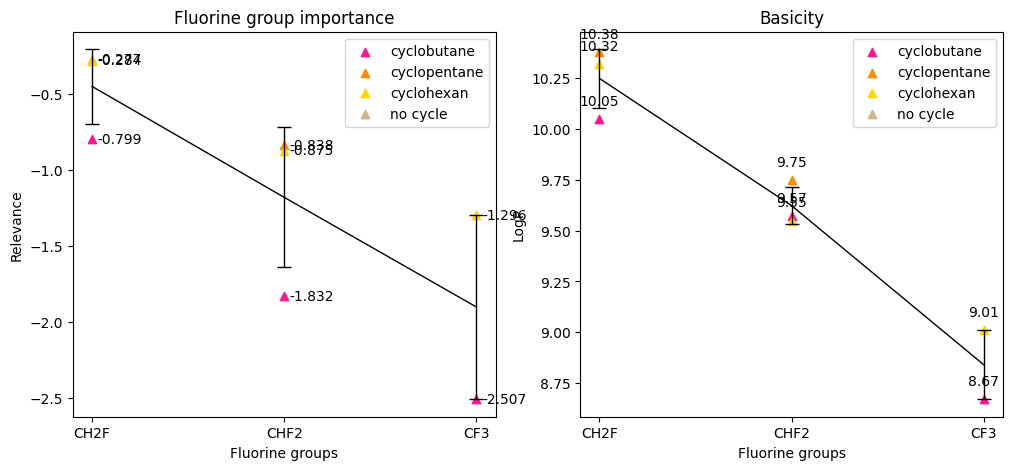

cyclohexane CHF FC1CCNCC1 9.05 -1.41
cyclohexane CHF2 FC(F)C1CCNCC1 10.19 -0.389
cyclohexane CH2F FCC1CCNCC1 10.46 -0.073
cyclohexane gem-CF2 FC1(F)CCNCC1 7.75 -2.733
cyclohexane CF3 FC(F)(F)C1CCNCC1 9.6 -0.487
['CH2F', 'CHF2', 'CF3'] [-0.073, -0.389, -0.487]
[] []
['CH2F', 'CHF2', 'CF3'] [[-0.073], [-0.389], [-0.487]]


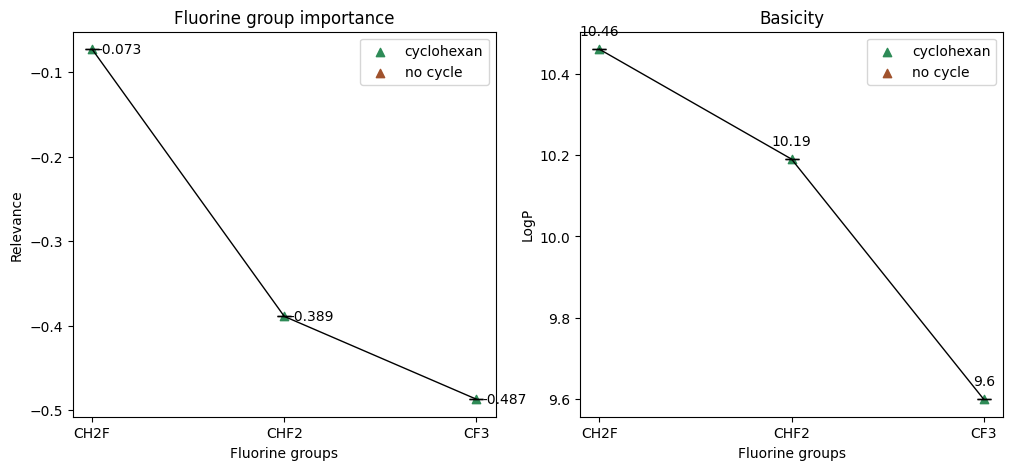

In [44]:
import matplotlib.pyplot as plt
import numpy as np

cyclobutane_color = {1: 'indigo', 2: 'deeppink'}
cyclopentane_color = {1: 'plum', 2: 'darkorange'}
cyclohexan_color = {1: 'turquoise', 2: 'gold', 3: 'seagreen'}
methane_color = {1: 'grey', 2: 'tan', 3: 'sienna'}

cyclobutane_name = 'cyclobutane'
cyclopentane_name = 'cyclopentane'
cyclohexan_name = 'cyclohexan'
methane_name = 'no cycle'

cyclobutane_logP = {1: {'H': [1.13]}, 2: {'H': [1.13]}}
cyclopentane_logP = {1: {'H': [1.19]}, 2: {'H': [1.19]}}
cyclohexan_logP = {1: {'H': [1.39]}, 2: {'H': [1.39]}, 3: {'H': [1.39]}}
methane_logP = {1: {'H': [1.03], 'CF3': [1.76]}, 2: {'H': [1.31]}, 3: {'H': [1.72]}}

for distance_global in range(1, 4):
    
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
    
    # X_optimal = ['H', 'CH2F', 'CHF2', 'CF3']
    X_optimal = ['CH2F', 'CHF2', 'CF3']
    # X_optimal = ['H', 'CHF', 'CH2F', 'gem-CF2', 'CHF2', 'CF3']
    for SMILES, distance in smiles_to_distance_to_nitrogen.items():
        logP_value = SMILES_to_pKa[SMILES]
    
        if distance != distance_global:
            continue
        
        if 'cyclohexane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclohexan:
                cyclohexan[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclohexan_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cyclohexan[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclohexan_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclopentane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopentane:
                cyclopentane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopentane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cyclopentane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopentane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            print("cyclopentane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclobutane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclobutane:
                cyclobutane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclobutane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cyclobutane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclobutane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            print("cyclobutane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])
        
        elif 'methane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group == 'non-F':
                continue
            if f_group in methane:
                methane[distance_global][f_group].append(relevances_fluorine[SMILES])
                methane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                methane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                methane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            print("methane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

    X, Y, Y_logP = [], [], []
    Y_dict = {f_group: [] for f_group in X_optimal}
    Y_logP_dict = {f_group: [] for f_group in X_optimal}
    for molecule_group, color, label, logP_dict in [(cyclobutane, cyclobutane_color, cyclobutane_name, cyclobutane_logP), 
                                                    (cyclopentane, cyclopentane_color, cyclopentane_name, cyclopentane_logP), 
                                                    (cyclohexan, cyclohexan_color, cyclohexan_name, cyclohexan_logP), 
                                                    (methane, methane_color, methane_name, methane_logP)
                                                    ]:
        y_relevance, y_logP, X_local = [], [], []
        if distance_global not in molecule_group:
            continue

        for f_group_optimal in X_optimal:
            if f_group_optimal not in molecule_group[distance_global]:
                continue
            X_local.append(f_group_optimal)

            Y_dict[f_group_optimal].append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            y_relevance.append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            Y_logP_dict[f_group_optimal].append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))
            y_logP.append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))

        print(X_local, y_relevance)
        ax1.scatter(X_local, y_relevance, marker='^', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X_local)):
            ax1.annotate(f"{str(y_relevance[i])}", (X_local[i], y_relevance[i]), xytext=(20, -3), textcoords='offset points', ha='center')
        ax1.legend()

        ax2.scatter(X_local, y_logP, marker='^', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X_local)):
            ax2.annotate(f"{str(y_logP[i])}", (X_local[i], y_logP[i]), xytext=(0, 10), textcoords='offset points', ha='center')
        ax2.legend()
    
    
    for f_group_name, relevances in Y_dict.items():
        if relevances != []:
            X.append(f_group_name)
            Y.append(relevances)
            Y_logP.append(Y_logP_dict[f_group_name])
    
    print(X, Y)
    mean_Y = [np.array(i).mean() for i in Y]
    std_deviation_Y = [np.array(i).std() for i in Y]
    
    ax1.plot(X, mean_Y, linestyle='-', color="black", label=label, linewidth=1)
    for i in range(len(X)):
        ax1.errorbar(X[i], mean_Y[i], yerr=std_deviation_Y[i], color='black', capsize=5, elinewidth=1, markeredgewidth=1)
    ax1.set_xlabel("Fluorine groups")
    ax1.set_ylabel("Relevance")
    ax1.set_title("Fluorine group importance")

    mean_logP_Y = [np.array(i).mean() for i in Y_logP]
    std_deviation_logP_Y = [np.array(i).std() for i in Y_logP]
    
    ax2.plot(X, mean_logP_Y, linestyle='-', color="black", label=label, linewidth=1)
    for i in range(len(X)):
        ax2.errorbar(X[i], mean_logP_Y[i], yerr=std_deviation_logP_Y[i], color='black', capsize=5, elinewidth=1, markeredgewidth=1)
    ax2.set_xlabel("Fluorine groups")
    ax2.set_ylabel("LogP")
    ax2.set_title("Basicity")

    plt.show()
    
    


primary amines

In [45]:

SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_pKa = prepare_data()
train_smiles, test_smiles, smiles_to_fold = train_test_smiles_data()

relevances_fluorine = {}
for SMILES, relevance in relevances_fluorine_all.items():
    if "prima" in SMILES_to_identificator[SMILES].lower():
        relevances_fluorine[SMILES] = relevance

cyclopropane = {1: {}, 2: {}}
cyclobutane = {1: {}, 2: {}, 3: {}} # logP_O=C(N1CCC1)C1=CC=CC=C1
cyclopentane = {1: {}, 2: {}, 3: {}} #  logP_O=C(N1CCCC1)C1=CC=CC=C1
cyclohexan = {1: {}, 2: {}, 3: {}, 4: {}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
cycloheptane = {1: {}, 2: {}, 3: {}, 4: {}} # logP_O=C(NC1CCCCCC1(F)F)c1ccccc1
methane = {1: {}, 2: {}, 3: {}, 4: {}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1


SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_pKa = prepare_data()
train_SMILES, test_SMILES, smiles_to_fold = train_test_smiles_data()

In [46]:
from rdkit import Chem
import math

smiles_to_distance_to_nitrogen = {}

def is_primary_amine(mol):
    # find nitrogen atom
    for atom in mol.GetAtoms():
        if atom.GetSymbol().lower() == 'n':
            nitrogen_atom_idx = atom.GetIdx()

    if not mol.GetAtomWithIdx(nitrogen_atom_idx).IsInRing():
        return True

    logP_ring_mol = Chem.MolFromSmiles('C1=CC=CC=C1')

    logP_ring_mol_match = list(mol.GetSubstructMatches(logP_ring_mol)[0])

    for atom in mol.GetAtomWithIdx(nitrogen_atom_idx).GetNeighbors():
        if atom.GetIdx() in logP_ring_mol_match:
            return True

    return False


for SMILES, relevance in relevances_fluorine.items():
    f_group_smiles = functional_group_to_smiles[SMILES_to_fgroup[SMILES]]

    mol = Chem.MolFromSmiles(SMILES)

    fluorine_deratives_mol = Chem.MolFromSmiles(f_group_smiles)

    derivatives_matches = mol.GetSubstructMatches(fluorine_deratives_mol)
    

    min_distance_to_nitrogen = math.inf
    is_secondary_amine_mol = is_primary_amine(mol)
    
    for match in derivatives_matches:
        from_atom = match[0]

        target_atom, distance = find_the_closest_nitrogen_atom(mol=mol, atom_id=from_atom)
        
        if distance < min_distance_to_nitrogen:
            min_distance_to_nitrogen = distance

    smiles_to_distance_to_nitrogen[SMILES] = min_distance_to_nitrogen

    if SMILES_to_cycle_type[SMILES] == 'methane' and f_group_smiles == "":
        smiles_to_distance_to_nitrogen[SMILES] = len(mol.GetAtoms()) - 2 - 8

    # print(SMILES, is_secondary_amine_mol)
    if not is_secondary_amine_mol:
        smiles_to_distance_to_nitrogen[SMILES] = math.inf
    
    print(SMILES, derivatives_matches, SMILES_to_fgroup[SMILES], min_distance_to_nitrogen)

N[C@@H]1C[C@@H]2[C@H](C1)C2(F)F ((6, 7), (6, 8)) gem-CF2 4
N[C@H]1C[C@@H]2[C@H](C1)C2(F)F ((6, 7), (6, 8)) gem-CF2 4
NC1CCC(F)(F)CC1 ((4, 5), (4, 6)) gem-CF2 4
NC1CCCCC1 () non-F inf
N[C@@H]1C[C@@H]2C[C@@H]2C1 () non-F inf
N[C@H]1C[C@@H]2C[C@@H]2C1 () non-F inf
NC1(C(F)(F)F)CCC1 ((1, 2, 3, 4, 5),) CF3 1
NC1(C(F)F)CCC1 ((1, 2, 3, 4),) CHF2 1
NC1(CF)CCC1 ((1, 2, 3),) CH2F 1
NC1CCC1 () non-F inf
N[C@H]1C[C@H](C(F)(F)F)C1 ((3, 4, 5, 6, 7),) CF3 3
N[C@H]1C[C@@H](C(F)(F)F)C1 ((3, 4, 5, 6, 7),) CF3 3
N[C@H]1C[C@H](C(F)F)C1 ((3, 4, 5, 6),) CHF2 3
N[C@H]1C[C@@H](C(F)F)C1 ((3, 4, 5, 6),) CHF2 3
N[C@H]1C[C@H](CF)C1 ((3, 4, 5),) CH2F 3
N[C@H]1C[C@@H](CF)C1 ((3, 4, 5),) CH2F 3
NCCF ((1, 2, 3),) CH2F 1
NCCC(F)F ((2, 3, 4, 5),) CHF2 2
NCCCF ((2, 3, 4),) CH2F 2
CCN () non-F inf
NCCCCF ((3, 4, 5),) CH2F 3
NCCCC(F)F ((3, 4, 5, 6),) CHF2 3
NCCCC(F)(F)F ((3, 4, 5, 6, 7),) CF3 3
CCCN () non-F inf
NC1CCC1(F)F ((4, 5), (4, 6)) gem-CF2 2
NC1CC(F)(F)C1 ((3, 4), (3, 5)) gem-CF2 3
NC1CCCCC1(F)F ((6, 7), (6, 8)) 

cyclobutane CF3 NC1(C(F)(F)F)CCC1 5.0 -4.618
cyclobutane CHF2 NC1(C(F)F)CCC1 6.62 -3.94
cyclobutane CH2F NC1(CF)CCC1 8.1 -3.136
methane CH2F NCCF 8.96 -3.428
cyclobutane ['CH2F', 'CHF2', 'CF3'] [-3.136, -3.94, -4.618]
cyclopropane [] []
cyclopentane [] []
cyclohexan [] []
cycloheptane [] []
methane ['CH2F'] [-3.428]
['CH2F', 'CHF2', 'CF3'] [[-3.136, -3.428], [-3.94], [-4.618]]
CH2F 8.530000000000001
CHF2 6.62
CF3 5.0


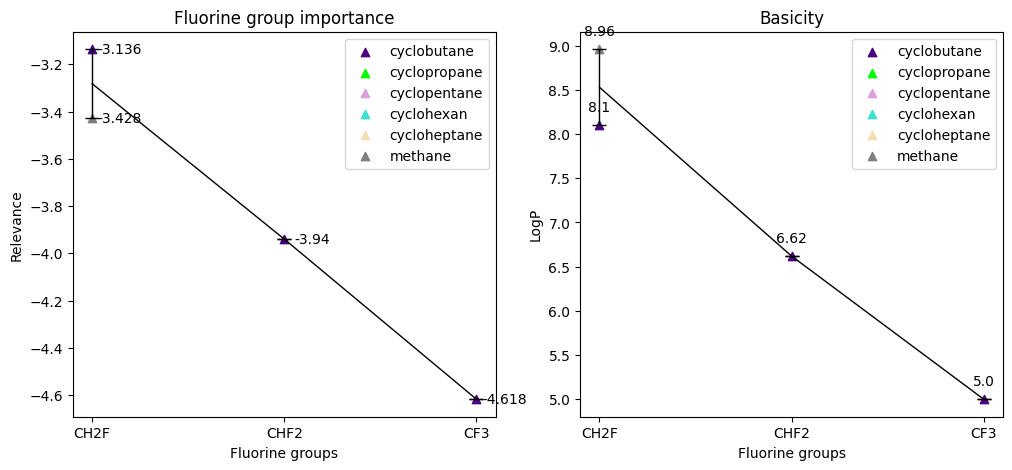

methane CHF2 NCCC(F)F 9.02 -1.574
methane CH2F NCCCF 10.05 -1.24
cyclobutane gem-CF2 NC1CCC1(F)F 7.2 -3.06
cyclohexane gem-CF2 NC1CCCCC1(F)F 7.45 -2.972
cyclohexane gem-CF2 NC1CCCCCC1(F)F 8.13 -3.08
methane gem-CF2 CCC(F)(F)CN 7.59 -2.46
cyclobutane CF3 N[C@@H]1CC[C@H]1C(F)(F)F 7.95 -2.264
cyclobutane CH2F N[C@@H]1CC[C@H]1CF 9.32 -1.658
cyclopropane CF3 N[C@@H]1C[C@H]1C(F)(F)F 7.18 -2.056
cyclopropane CF3 N[C@H]1C[C@H]1C(F)(F)F 6.92 -2.019
cyclopropane CHF2 N[C@@H]1C[C@H]1C(F)F 7.76 -1.992
cyclopropane CHF2 N[C@H]1C[C@H]1C(F)F 7.16 -1.937
cyclopentane gem-CF2 NC1CCCC1(F)F 7.54 -3.193
cyclobutane CHF2 N[C@@H]1CC[C@H]1C(F)F 8.98 -1.941
cyclobutane ['CH2F', 'CHF2', 'CF3'] [-1.658, -1.941, -2.264]
cyclopropane ['CHF2', 'CF3'] [-1.937, -2.019]
cyclopentane [] []
cyclohexan [] []
cycloheptane [] []
methane ['CH2F', 'CHF2'] [-1.24, -1.574]
['CH2F', 'CHF2', 'CF3'] [[-1.658, -1.24], [-1.941, -1.937, -1.574], [-2.264, -2.019]]
CH2F 9.685
CHF2 8.386666666666667
CF3 7.4350000000000005


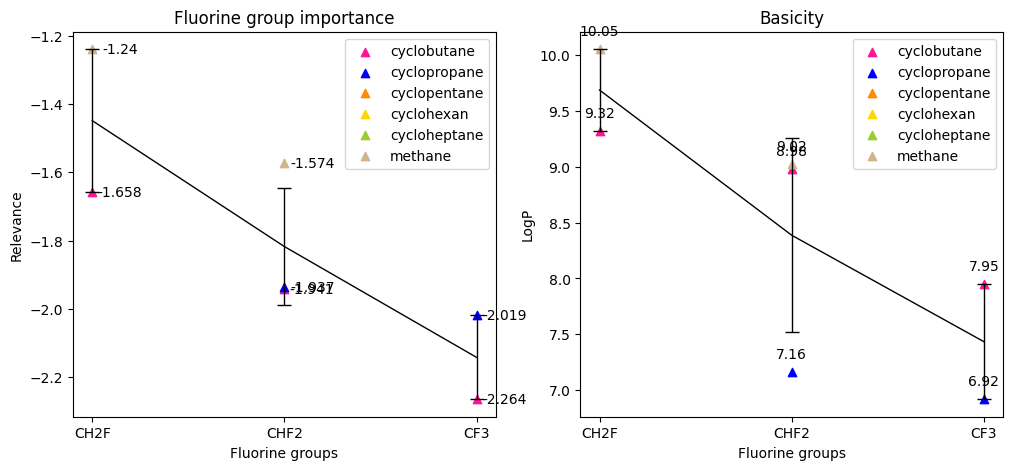

cyclobutane CF3 N[C@H]1C[C@H](C(F)(F)F)C1 8.74 -1.22
cyclobutane CF3 N[C@H]1C[C@@H](C(F)(F)F)C1 8.6 -1.179
cyclobutane CHF2 N[C@H]1C[C@H](C(F)F)C1 9.17 -1.106
cyclobutane CHF2 N[C@H]1C[C@@H](C(F)F)C1 9.04 -1.03
cyclobutane CH2F N[C@H]1C[C@H](CF)C1 9.58 -0.812
cyclobutane CH2F N[C@H]1C[C@@H](CF)C1 9.48 -0.698
methane CH2F NCCCCF 10.36 -0.264
methane CHF2 NCCCC(F)F 10.02 -0.323
methane CF3 NCCCC(F)(F)F 9.74 -0.579
cyclobutane gem-CF2 NC1CC(F)(F)C1 8.37 -1.584
cyclohexane gem-CF2 NC1CCCC(F)(F)C1 9.12 -1.022
cyclohexane gem-CF2 NC1CCCCC(F)(F)C1 9.35 -1.121
methane gem-CF2 CC(F)(F)CCN 9.57 -0.829
cyclopentane gem-CF2 NC1CCC(F)(F)C1 8.83 -1.693
cyclobutane ['CH2F', 'CHF2', 'CF3'] [-0.698, -1.03, -1.179]
cyclopentane [] []
cyclohexan [] []
cycloheptane [] []
methane ['CH2F', 'CHF2', 'CF3'] [-0.264, -0.323, -0.579]
['CH2F', 'CHF2', 'CF3'] [[-0.698, -0.264], [-1.03, -0.323], [-1.179, -0.579]]
CH2F 9.92
CHF2 9.53
CF3 9.17


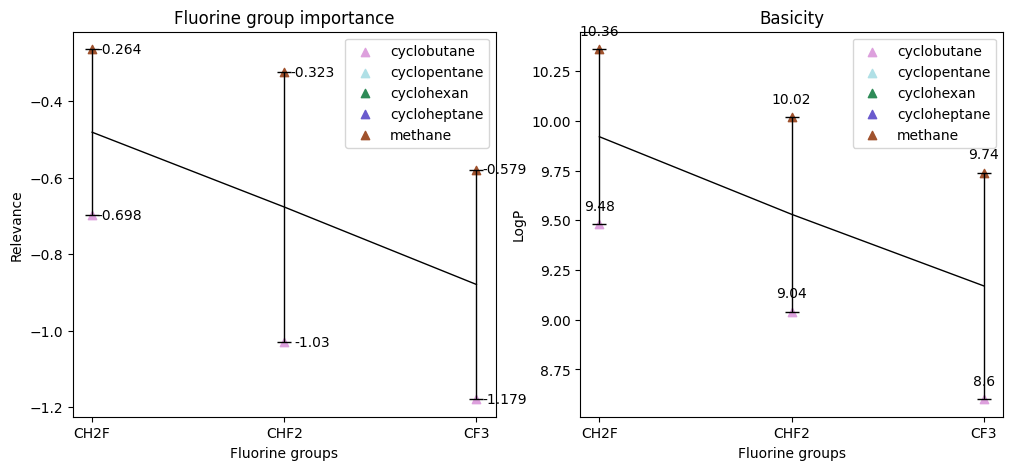

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

cyclopropane_color = {1: 'lime', 2: 'blue'}
cyclobutane_color = {1: 'indigo', 2: 'deeppink', 3: 'plum'}
cyclopentane_color = {1: 'plum', 2: 'darkorange', 3: 'powderblue'}
cyclohexan_color = {1: 'turquoise', 2: 'gold', 3: 'seagreen', 4: 'salmon'}
cycloheptane_color = {1: 'wheat', 2: 'yellowgreen', 3: 'slateblue', 4: 'sandybrown'}
methane_color = {1: 'grey', 2: 'tan', 3: 'sienna', 4: 'blue'}

cyclopropane_name = 'cyclopropane'
cyclobutane_name = 'cyclobutane'
cyclopentane_name = 'cyclopentane'
cyclohexan_name = 'cyclohexan'
cycloheptane_name = 'cycloheptane'
methane_name = 'methane'

cyclopropane_logP = {1: {'H': [1.29]}, 2: {'H': [1.29]}}
cyclobutane_logP = {1: {'H': [1.95]}, 2: {'H': [1.95]}, 3: {'H': [1.95]}}
cyclopentane_logP = {1: {'H': [2.23]}, 2: {'H': [2.23]}, 3: {'H': [2.23]}}
cyclohexan_logP = {1: {'H': [2.72]}, 2: {'H': [2.72]}, 3: {'H': [2.72]}, 4: {'H': [2.72]}}
cycloheptane_logP = {1: {'H': [3.03]}, 2: {'H': [3.03]}, 3: {'H': [3.03]}, 4: {'H': [3.03]}}
methane_logP = {1: {'H': [1.03], 'CF3': [1.76]}, 2: {'H': [1.31]}, 3: {'H': [1.72]}, 4: {}}

for distance_global in range(1, 4):
    
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
    
    # X_optimal = ['H', 'CH2F', 'CHF2', 'CF3']
    X_optimal = ['CH2F', 'CHF2', 'CF3']
    # X_optimal = ['H', 'CHF', 'CH2F', 'gem-CF2', 'CHF2', 'CF3']
    for SMILES, distance in smiles_to_distance_to_nitrogen.items():
        logP_value = SMILES_to_pKa[SMILES]
    
        if distance != distance_global:
            continue
        
        if 'cyclopropane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopropane:
                cyclopropane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopropane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cyclopropane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopropane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            print("cyclopropane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        if 'cyclohexane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclohexan:
                cyclohexan[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclohexan_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cyclohexan[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclohexan_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        if 'cycloheptane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cycloheptane:
                cycloheptane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cycloheptane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cycloheptane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cycloheptane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclopentane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopentane:
                cyclopentane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopentane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cyclopentane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopentane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            print("cyclopentane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclobutane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclobutane:
                cyclobutane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclobutane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cyclobutane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclobutane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            print("cyclobutane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])
        
        elif 'methane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group == 'non-F':
                continue
            if f_group in methane:
                methane[distance_global][f_group].append(relevances_fluorine[SMILES])
                methane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                methane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                methane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            print("methane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

    X, Y, Y_logP = [], [], []
    Y_dict = {f_group: [] for f_group in X_optimal}
    Y_logP_dict = {f_group: [] for f_group in X_optimal}
    print("="*30)
    for molecule_group, color, label, logP_dict in [(cyclobutane, cyclobutane_color, cyclobutane_name, cyclobutane_logP),
                                                    (cyclopropane, cyclopropane_color, cyclopropane_name, cyclopropane_logP), 
                                                    (cyclopentane, cyclopentane_color, cyclopentane_name, cyclopentane_logP), 
                                                    (cyclohexan, cyclohexan_color, cyclohexan_name, cyclohexan_logP), 
                                                    (cycloheptane, cycloheptane_color, cycloheptane_name, cycloheptane_logP), 
                                                    (methane, methane_color, methane_name, methane_logP)
                                                    ]:
        y_relevance, y_logP, X_local = [], [], []
        if distance_global not in molecule_group:
            continue

        for f_group_optimal in X_optimal:
            if f_group_optimal not in molecule_group[distance_global]:
                continue
            X_local.append(f_group_optimal)

            Y_dict[f_group_optimal].append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            y_relevance.append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            Y_logP_dict[f_group_optimal].append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))
            y_logP.append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))

        print(label, X_local, y_relevance)
        # lists = sorted(zip(*[X_local, y_relevance]))
        # new_x, new_y = list(zip(*lists))
        ax1.scatter(X_local, y_relevance, marker='^', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X_local)):
            ax1.annotate(f"{str(y_relevance[i])}", (X_local[i], y_relevance[i]), xytext=(20, -3), textcoords='offset points', ha='center')
        ax1.legend()

        ax2.scatter(X_local, y_logP, marker='^', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X_local)):
            ax2.annotate(f"{str(y_logP[i])}", (X_local[i], y_logP[i]), xytext=(0, 10), textcoords='offset points', ha='center')
        ax2.legend()
    
    
    for f_group_name, relevances in Y_dict.items():
        if relevances != []:
            X.append(f_group_name)
            Y.append(relevances)
            Y_logP.append(Y_logP_dict[f_group_name])
    
    print(X, Y)
    mean_Y = [np.array(i).mean() for i in Y]
    std_deviation_Y = [np.array(i).std() for i in Y]
    
    ax1.plot(X, mean_Y, linestyle='-', color="black", label=label, linewidth=1)
    for i in range(len(X)):
        ax1.errorbar(X[i], mean_Y[i], yerr=std_deviation_Y[i], color='black', capsize=5, elinewidth=1, markeredgewidth=1)
    ax1.set_xlabel("Fluorine groups")
    ax1.set_ylabel("Relevance")
    ax1.set_title("Fluorine group importance")

    mean_logP_Y = [np.array(i).mean() for i in Y_logP]
    std_deviation_logP_Y = [np.array(i).std() for i in Y_logP]
    
    ax2.plot(X, mean_logP_Y, linestyle='-', color="black", label=label, linewidth=1)
    for i in range(len(X)):
        print(X[i], mean_logP_Y[i])
        ax2.errorbar(X[i], mean_logP_Y[i], yerr=std_deviation_logP_Y[i], color='black', capsize=5, elinewidth=1, markeredgewidth=1)
    ax2.set_xlabel("Fluorine groups")
    ax2.set_ylabel("LogP")
    ax2.set_title("Basicity")

    plt.show()
    
    


--------

--------

--------

--------

--------

ACIDIC SME

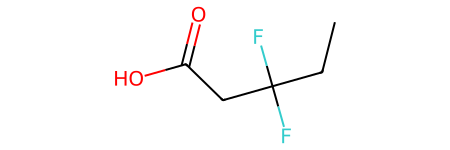

In [48]:
from rdkit import Chem

mol = Chem.MolFromSmiles('CCC(F)(F)CC(=O)O')

mol

In [49]:

SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_pKa = prepare_data()
train_smiles, test_smiles, smiles_to_fold = train_test_smiles_data()

relevances_fluorine = {}
for SMILES, relevance in relevances_fluorine_all.items():
    if "acid" in SMILES_to_identificator[SMILES].lower():
        relevances_fluorine[SMILES] = relevance

cyclopropane = {1: {}, 2: {}}
cyclobutane = {1: {}, 2: {}, 3: {}} # logP_O=C(N1CCC1)C1=CC=CC=C1
cyclopentane = {1: {}, 2: {}, 3: {}} #  logP_O=C(N1CCCC1)C1=CC=CC=C1
cyclohexan = {1: {}, 2: {}, 3: {}, 4: {}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
cycloheptane = {1: {}, 2: {}, 3: {}, 4: {}} # logP_O=C(NC1CCCCCC1(F)F)c1ccccc1
methane = {1: {}, 2: {}, 3: {}, 4: {}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_pKa = prepare_data()
train_SMILES, test_SMILES, smiles_to_fold = train_test_smiles_data()

In [50]:
def find_the_closest_oxygen_atom(
        mol, atom_id: int, 
        atoms_not_to_visit: list = []):

    queue = deque([(atom_id, 0)])

    visited = set()
    
    while queue:
        current_atom, distance = queue.popleft()
        if mol.GetAtomWithIdx(current_atom).GetSymbol().lower() == 'o':
            break

        visited.add(current_atom)
        
        neighbors = []
        for atom in mol.GetAtomWithIdx(current_atom).GetNeighbors():
            if atom.GetSymbol().lower() == 'h':
                continue
            if atom.GetIdx() in atoms_not_to_visit:
                continue
            neighbors.append(atom.GetIdx())
        
        for neighbor in neighbors:
            if neighbor not in visited:
                queue.append((neighbor, distance + 1))
    
    return current_atom, distance - 2

In [51]:
from rdkit import Chem
import math

smiles_to_distance_to_nitrogen = {}

def is_primary_amine(mol):
    # find nitrogen atom
    for atom in mol.GetAtoms():
        if atom.GetSymbol().lower() == 'n':
            nitrogen_atom_idx = atom.GetIdx()

    if not mol.GetAtomWithIdx(nitrogen_atom_idx).IsInRing():
        return True

    logP_ring_mol = Chem.MolFromSmiles('C1=CC=CC=C1')

    logP_ring_mol_match = list(mol.GetSubstructMatches(logP_ring_mol)[0])

    for atom in mol.GetAtomWithIdx(nitrogen_atom_idx).GetNeighbors():
        if atom.GetIdx() in logP_ring_mol_match:
            return True

    return False


for SMILES, relevance in relevances_fluorine.items():
    f_group_smiles = functional_group_to_smiles[SMILES_to_fgroup[SMILES]]

    mol = Chem.MolFromSmiles(SMILES)

    fluorine_deratives_mol = Chem.MolFromSmiles(f_group_smiles)

    derivatives_matches = mol.GetSubstructMatches(fluorine_deratives_mol)
    

    min_distance_to_nitrogen = math.inf
    
    for match in derivatives_matches:
        from_atom = match[0]

        target_atom, distance = find_the_closest_oxygen_atom(mol=mol, atom_id=from_atom)
        
        if distance < min_distance_to_nitrogen:
            min_distance_to_nitrogen = distance

    smiles_to_distance_to_nitrogen[SMILES] = min_distance_to_nitrogen

    if SMILES_to_cycle_type[SMILES] == 'methane' and f_group_smiles == "":
        smiles_to_distance_to_nitrogen[SMILES] = len(mol.GetAtoms()) - 2 - 8

    # print(SMILES, is_secondary_amine_mol)
    # if not is_secondary_amine_mol:
    #     smiles_to_distance_to_nitrogen[SMILES] = math.inf
    
    print(SMILES, derivatives_matches, SMILES_to_fgroup[SMILES], min_distance_to_nitrogen, SMILES_to_cycle_type[SMILES])

O=C(O)C1CCC(F)(F)CC1 ((6, 7), (6, 8)) gem-CF2 3 cyclohexane
O=C(O)C1CCCCC1 () non-F inf cyclohexane
O=C(O)[C@H]1C[C@@H]2C[C@@H]2C1 () non-F inf bicyclo[3.1.0]hexane
O=C(O)[C@H]1C[C@@H]2[C@H](C1)C2(F)F ((8, 9), (8, 10)) gem-CF2 3 bicyclo[3.1.0]hexane
O=C(O)[C@@H]1C[C@@H]2[C@H](C1)C2(F)F ((8, 9), (8, 10)) gem-CF2 3 bicyclo[3.1.0]hexane
O=C(O)C1CCC1 () non-F inf cyclobutane
O=C(O)C1(CF)CCC1 ((3, 4, 5),) CH2F 0 cyclobutane
O=C(O)C1(C(F)F)CCC1 ((3, 4, 5, 6),) CHF2 0 cyclobutane
O=C(O)C1(C(F)(F)F)CCC1 ((3, 4, 5, 6, 7),) CF3 0 cyclobutane
O=C(O)[C@H]1C[C@H](C(F)(F)F)C1 ((5, 6, 7, 8, 9),) CF3 2 cyclobutane
O=C(O)[C@H]1C[C@@H](C(F)(F)F)C1 ((5, 6, 7, 8, 9),) CF3 2 cyclobutane
O=C(O)[C@H]1C[C@H](C(F)F)C1 ((5, 6, 7, 8),) CHF2 2 cyclobutane
O=C(O)[C@H]1C[C@@H](C(F)F)C1 ((5, 6, 7, 8),) CHF2 2 cyclobutane
O=C(O)[C@H]1C[C@H](CF)C1 ((5, 6, 7),) CH2F 2 cyclobutane
O=C(O)[C@H]1C[C@@H](CF)C1 ((5, 6, 7),) CH2F 2 cyclobutane
O=C(O)C1CC1(F)F ((5, 6), (5, 7)) gem-CF2 1 cyclopropane
O=C(O)C1CCC1(F)F ((6, 7), (

cyclopropane gem-CF2 O=C(O)C1CC1(F)F 3.25 -1.148
cyclobutane gem-CF2 O=C(O)C1CCC1(F)F 3.62 -0.962
cyclopentane gem-CF2 O=C(O)C1CCCC1(F)F 3.76 -0.865
cyclohexane gem-CF2 O=C(O)C1CCCCC1(F)F 3.81 -0.854
cyclohexane gem-CF2 O=C(O)C1CCCCCC1(F)F 3.78 -0.261
methane gem-CF2 CCC(F)(F)CC(=O)O 3.55 -0.957
cyclobutane CF3 O=C(O)[C@@H]1CC[C@H]1C(F)(F)F 3.87 -0.319
cyclobutane CHF2 O=C(O)[C@@H]1CC[C@H]1C(F)F 4.26 -0.321
cyclobutane CH2F O=C(O)[C@@H]1CC[C@H]1CF 4.38 -0.182
cyclopropane CF3 O=C(O)[C@@H]1C[C@H]1C(F)(F)F 3.88 -0.277
cyclopropane CF3 O=C(O)[C@H]1C[C@H]1C(F)(F)F 3.76 -0.291
cyclopropane CHF2 O=C(O)[C@@H]1C[C@H]1C(F)F 4.18 -0.369
cyclopropane CHF2 O=C(O)[C@H]1C[C@H]1C(F)F 4.17 -0.372
cyclopropane CH2F O=C(O)[C@@H]1C[C@H]1CF 4.35 -0.327
Y_logP_dict {'CH2F': [], 'CHF2': [], 'CF3': []}
['CH2F', 'CHF2', 'CF3'] [-0.327, -0.372, -0.291]
['CH2F', 'CHF2', 'CF3'] [-0.182, -0.321, -0.319]
[] []
[] []
[] []
[] []
['CH2F', 'CHF2', 'CF3'] [[-0.327, -0.182], [-0.372, -0.321], [-0.291, -0.319]]


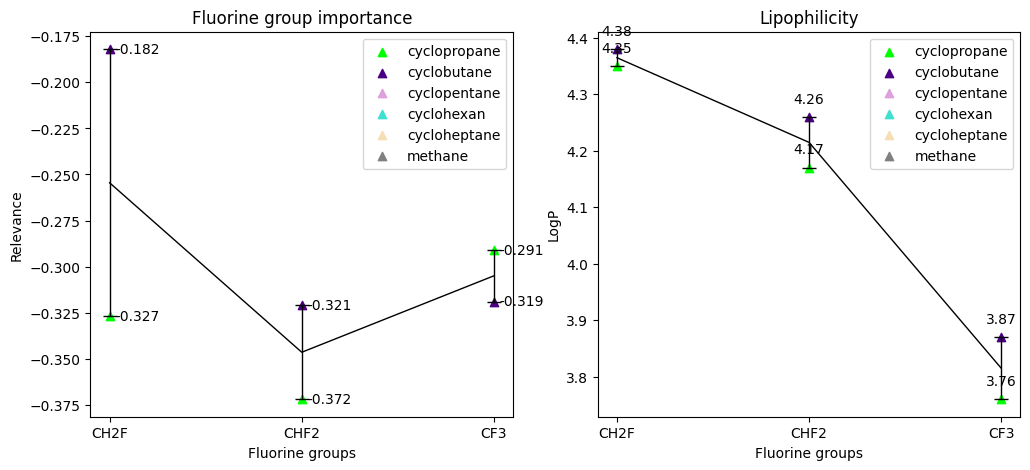

cyclobutane CF3 O=C(O)[C@H]1C[C@H](C(F)(F)F)C1 3.83 -0.281
cyclobutane CF3 O=C(O)[C@H]1C[C@@H](C(F)(F)F)C1 3.88 -0.32
cyclobutane CHF2 O=C(O)[C@H]1C[C@H](C(F)F)C1 4.11 -0.327
cyclobutane CHF2 O=C(O)[C@H]1C[C@@H](C(F)F)C1 3.92 -0.246
cyclobutane CH2F O=C(O)[C@H]1C[C@H](CF)C1 4.18 -0.328
cyclobutane CH2F O=C(O)[C@H]1C[C@@H](CF)C1 4.12 -0.307
cyclobutane gem-CF2 O=C(O)C1CC(F)(F)C1 4.02 -0.687
cyclopentane gem-CF2 O=C(O)C1CCC(F)(F)C1 3.98 -0.092
cyclohexane gem-CF2 O=C(O)C1CCCCC(F)(F)C1 4.09 -0.094
methane gem-CF2 CC(F)(F)CCC(=O)O 4.17 -0.111
cyclohexane gem-CF2 O=C(O)C1CCCC(F)(F)C1 4.18 -0.303
methane CHF2 O=C(O)CCCC(F)F 4.38 -0.007
Y_logP_dict {'CH2F': [], 'CHF2': [], 'CF3': []}
[] []
['CH2F', 'CHF2', 'CF3'] [-0.307, -0.246, -0.32]
[] []
[] []
[] []
['CHF2'] [-0.007]
['CH2F', 'CHF2', 'CF3'] [[-0.307], [-0.246, -0.007], [-0.32]]


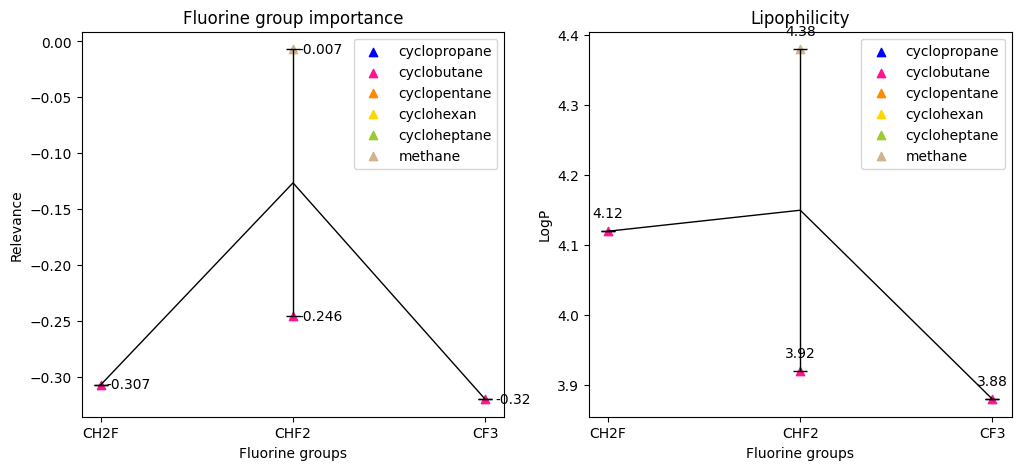

cyclohexane gem-CF2 O=C(O)C1CCC(F)(F)CC1 4.32 -0.053
cyclohexane gem-CF2 O=C(O)C1CCCC(F)(F)CC1 4.36 -0.031
Y_logP_dict {'CH2F': [], 'CHF2': [], 'CF3': []}
[] []
[] []
[] []
[] []
[] []
[] []


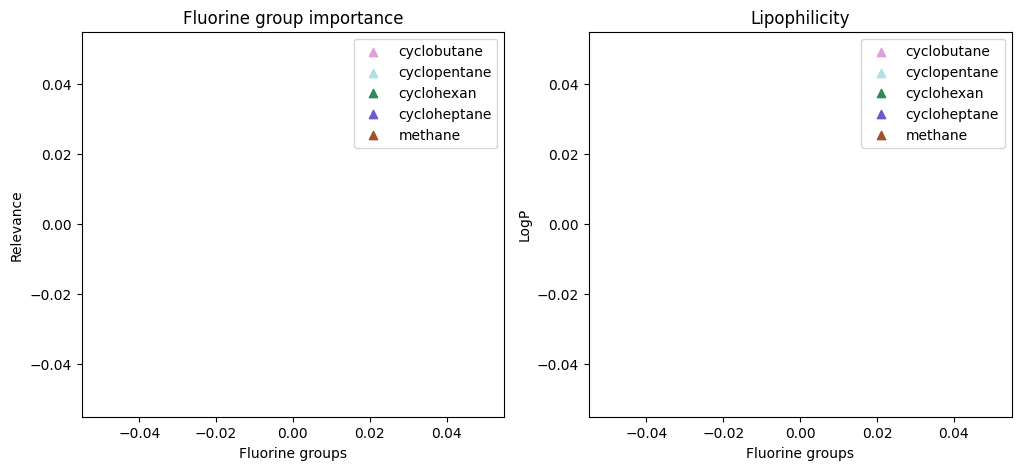

In [52]:
import matplotlib.pyplot as plt
import numpy as np

cyclopropane_color = {1: 'lime', 2: 'blue'}
cyclobutane_color = {1: 'indigo', 2: 'deeppink', 3: 'plum'}
cyclopentane_color = {1: 'plum', 2: 'darkorange', 3: 'powderblue'}
cyclohexan_color = {1: 'turquoise', 2: 'gold', 3: 'seagreen', 4: 'salmon'}
cycloheptane_color = {1: 'wheat', 2: 'yellowgreen', 3: 'slateblue', 4: 'sandybrown'}
methane_color = {1: 'grey', 2: 'tan', 3: 'sienna'}

cyclopropane_name = 'cyclopropane'
cyclobutane_name = 'cyclobutane'
cyclopentane_name = 'cyclopentane'
cyclohexan_name = 'cyclohexan'
cycloheptane_name = 'cycloheptane'
methane_name = 'methane'

cyclopropane_logP = {1: {'H': [1.92]}, 2: {'H': [1.92]}}
cyclobutane_logP = {1: {'H': [2.26]}, 2: {'H': [2.26]}, 3: {'H': [2.26]}}
cyclopentane_logP = {1: {'H': [2.68]}, 2: {'H': [2.68]}, 3: {'H': [2.68]}}
cyclohexan_logP = {1: {'H': [2.49]}, 2: {'H': [2.49]}, 3: {'H': [2.49]}, 4: {'H': [2.49]}}
cycloheptane_logP = {1: {'H': [3.24]}, 2: {'H': [3.24]}, 3: {'H': [3.24]}, 4: {'H': [3.24]}}
methane_logP = {1: {}, 2: {}, 3: {}}

for distance_global in range(1, 4):
    
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
    
    # X_optimal = ['H', 'CH2F', 'CHF2', 'CF3']
    X_optimal = ['CH2F', 'CHF2', 'CF3']
    # X_optimal = ['H', 'CHF', 'CH2F', 'gem-CF2', 'CHF2', 'CF3']
    for SMILES, distance in smiles_to_distance_to_nitrogen.items():
        logP_value = SMILES_to_pKa[SMILES]
    
        if distance != distance_global:
            continue
        
        if 'cyclopropane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopropane:
                cyclopropane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopropane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cyclopropane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopropane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            print("cyclopropane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        if 'cyclohexane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclohexan:
                cyclohexan[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclohexan_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cyclohexan[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclohexan_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        if 'cycloheptane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cycloheptane:
                cycloheptane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cycloheptane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cycloheptane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cycloheptane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclopentane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopentane:
                cyclopentane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopentane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cyclopentane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopentane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            print("cyclopentane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclobutane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclobutane:
                cyclobutane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclobutane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cyclobutane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclobutane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            print("cyclobutane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])
        
        elif 'methane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group == 'non-F':
                continue
            if f_group in methane:
                methane[distance_global][f_group].append(relevances_fluorine[SMILES])
                methane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                methane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                methane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            print("methane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

    X, Y, Y_logP = [], [], []
    Y_dict = {f_group: [] for f_group in X_optimal}
    Y_logP_dict = {f_group: [] for f_group in X_optimal}
    print("Y_logP_dict", Y_logP_dict)
    for molecule_group, color, label, logP_dict in [(cyclopropane, cyclopropane_color, cyclopropane_name, cyclopropane_logP),
                                                    (cyclobutane, cyclobutane_color, cyclobutane_name, cyclobutane_logP), 
                                                    (cyclopentane, cyclopentane_color, cyclopentane_name, cyclopentane_logP), 
                                                    (cyclohexan, cyclohexan_color, cyclohexan_name, cyclohexan_logP), 
                                                    (cycloheptane, cycloheptane_color, cycloheptane_name, cycloheptane_logP), 
                                                    (methane, methane_color, methane_name, methane_logP)
                                                    ]:
        y_relevance, y_logP, X_local = [], [], []
        if distance_global not in molecule_group:
            continue

        for f_group_optimal in X_optimal:
            if f_group_optimal not in molecule_group[distance_global]:
                continue
            X_local.append(f_group_optimal)

            Y_dict[f_group_optimal].append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            y_relevance.append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            Y_logP_dict[f_group_optimal].append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))
            y_logP.append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))

        print(X_local, y_relevance)
        ax1.scatter(X_local, y_relevance, marker='^', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X_local)):
            ax1.annotate(f"{str(y_relevance[i])}", (X_local[i], y_relevance[i]), xytext=(20, -3), textcoords='offset points', ha='center')
        ax1.legend()

        ax2.scatter(X_local, y_logP, marker='^', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X_local)):
            ax2.annotate(f"{str(y_logP[i])}", (X_local[i], y_logP[i]), xytext=(0, 10), textcoords='offset points', ha='center')
        ax2.legend()
    
    
    for f_group_name, relevances in Y_dict.items():
        if relevances != []:
            X.append(f_group_name)
            Y.append(relevances)
            Y_logP.append(Y_logP_dict[f_group_name])
    
    print(X, Y)
    mean_Y = [np.array(i).mean() for i in Y]
    std_deviation_Y = [np.array(i).std() for i in Y]
    
    ax1.plot(X, mean_Y, linestyle='-', color="black", label=label, linewidth=1)
    for i in range(len(X)):
        ax1.errorbar(X[i], mean_Y[i], yerr=std_deviation_Y[i], color='black', capsize=5, elinewidth=1, markeredgewidth=1)
    ax1.set_xlabel("Fluorine groups")
    ax1.set_ylabel("Relevance")
    ax1.set_title("Fluorine group importance")

    mean_logP_Y = [np.array(i).mean() for i in Y_logP]
    std_deviation_logP_Y = [np.array(i).std() for i in Y_logP]
    
    ax2.plot(X, mean_logP_Y, linestyle='-', color="black", label=label, linewidth=1)
    for i in range(len(X)):
        ax2.errorbar(X[i], mean_logP_Y[i], yerr=std_deviation_logP_Y[i], color='black', capsize=5, elinewidth=1, markeredgewidth=1)
    ax2.set_xlabel("Fluorine groups")
    ax2.set_ylabel("LogP")
    ax2.set_title("Lipophilicity")

    plt.show()
    
    
